## Part 1: Import, Load Data.

* ### Import 

In [614]:
#
#Data fields
#Here's a brief version of what you'll find in the data description file.

#SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
#MSSubClass: The building class
#MSZoning: The general zoning classification
#LotFrontage: Linear feet of street connected to property
#LotArea: Lot size in square feet
#Street: Type of road access
#Alley: Type of alley access
#LotShape: General shape of property
#LandContour: Flatness of the property
#Utilities: Type of utilities available
#LotConfig: Lot configuration
#LandSlope: Slope of property
#Neighborhood: Physical locations within Ames city limits
#Condition1: Proximity to main road or railroad
#Condition2: Proximity to main road or railroad (if a second is present)
#BldgType: Type of dwelling
#HouseStyle: Style of dwelling
#OverallQual: Overall material and finish quality
#OverallCond: Overall condition rating
#YearBuilt: Original construction date
#YearRemodAdd: Remodel date
#RoofStyle: Type of roof
#RoofMatl: Roof material
#Exterior1st: Exterior covering on house
#Exterior2nd: Exterior covering on house (if more than one material)
#MasVnrType: Masonry veneer type
#MasVnrArea: Masonry veneer area in square feet
#ExterQual: Exterior material quality
#ExterCond: Present condition of the material on the exterior
#Foundation: Type of foundation
#BsmtQual: Height of the basement
#BsmtCond: General condition of the basement
#BsmtExposure: Walkout or garden level basement walls
#BsmtFinType1: Quality of basement finished area
#BsmtFinSF1: Type 1 finished square feet
#BsmtFinType2: Quality of second finished area (if present)
#BsmtFinSF2: Type 2 finished square feet
#BsmtUnfSF: Unfinished square feet of basement area
#TotalBsmtSF: Total square feet of basement area
#Heating: Type of heating
#HeatingQC: Heating quality and condition
#CentralAir: Central air conditioning
#Electrical: Electrical system
#1stFlrSF: First Floor square feet
#2ndFlrSF: Second floor square feet
#LowQualFinSF: Low quality finished square feet (all floors)
#GrLivArea: Above grade (ground) living area square feet
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms
#FullBath: Full bathrooms above grade
#HalfBath: Half baths above grade
#Bedroom: Number of bedrooms above basement level
#Kitchen: Number of kitchens
#KitchenQual: Kitchen quality
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#Functional: Home functionality rating
#Fireplaces: Number of fireplaces
#FireplaceQu: Fireplace quality
#GarageType: Garage location
#GarageYrBlt: Year garage was built
#GarageFinish: Interior finish of the garage
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#GarageQual: Garage quality
#GarageCond: Garage condition
#PavedDrive: Paved driveway
#WoodDeckSF: Wood deck area in square feet
#OpenPorchSF: Open porch area in square feet
#EnclosedPorch: Enclosed porch area in square feet
#3SsnPorch: Three season porch area in square feet
#ScreenPorch: Screen porch area in square feet
#PoolArea: Pool area in square feet
#PoolQC: Pool quality
#Fence: Fence quality
#MiscFeature: Miscellaneous feature not covered in other categories
#MiscVal: $Value of miscellaneous feature
#MoSold: Month Sold
#YrSold: Year Sold
#SaleType: Type of sale
#SaleCondition: Condition of sale  

In [729]:
# Импортируем библиотеки               

import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt



# Импортируем модели и метрики
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [660]:
# Заберем данные из csv-файлов
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# Определим таргет
target = train['SalePrice']

In [617]:
# Опишем тренировочный датасет
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [618]:
# Опишем тестовый датасет
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [619]:
# Посмотрим несколько первых строк из тренировочного датасета 
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [661]:
print('train:', train.shape)
print('test:', test.shape)
print('test:', target.shape)

train: (1460, 81)
test: (1459, 80)
test: (1460,)


In [621]:
print(set(train['Alley']))

{'Pave', nan, 'Grvl'}


In [622]:
# Опишем подробнее таргет (поле SalePrice)
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\sergo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


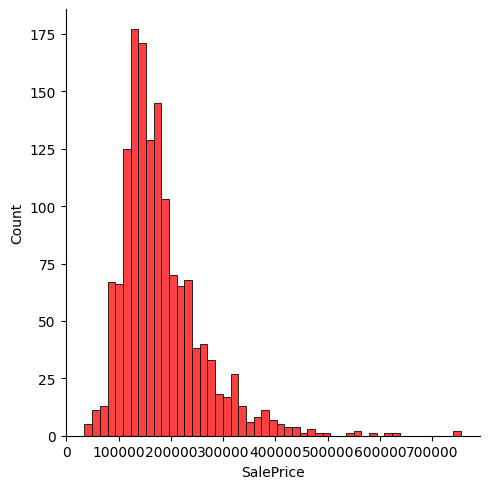

In [623]:
# Визуализируем распределение таргета
sb.displot(target, color='r')

In [662]:
# Отправим ID в индекс, после проверим.
train = train.set_index('Id')
test = test.set_index('Id')

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [664]:
# Разобьем данные на числовые и категориальные
numerical_feats_train = train.dtypes[train.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats_train))
print ()
print (train[numerical_feats_train].columns)
print ()
categorical_feats_train = train.dtypes[train.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats_train))
print ()
print (train[categorical_feats_train].columns)

Quantity of Numerical features:  37

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Quantity of Categorical features:  43

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCon

In [626]:
# Проверим тренировочный сет на пропущенные значения
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN values for 50 rows.")
nan_columns

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

There are 19 columns with NAN values for 50 rows.


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [665]:
cat_cols = []
total_count = train.shape[0]
for col in train.columns:
    # Количество пустых значений 
    temp_null_count = train[train[col].isnull()].shape[0]
    dt = str(train[col].dtype)
    if temp_null_count>0:
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Процент пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка LotFrontage. Тип данных float64. Процент пустых значений 259, 17.74%.
Колонка Alley. Тип данных object. Процент пустых значений 1369, 93.77%.
Колонка MasVnrType. Тип данных object. Процент пустых значений 8, 0.55%.
Колонка MasVnrArea. Тип данных float64. Процент пустых значений 8, 0.55%.
Колонка BsmtQual. Тип данных object. Процент пустых значений 37, 2.53%.
Колонка BsmtCond. Тип данных object. Процент пустых значений 37, 2.53%.
Колонка BsmtExposure. Тип данных object. Процент пустых значений 38, 2.6%.
Колонка BsmtFinType1. Тип данных object. Процент пустых значений 37, 2.53%.
Колонка BsmtFinType2. Тип данных object. Процент пустых значений 38, 2.6%.
Колонка Electrical. Тип данных object. Процент пустых значений 1, 0.07%.
Колонка FireplaceQu. Тип данных object. Процент пустых значений 690, 47.26%.
Колонка GarageType. Тип данных object. Процент пустых значений 81, 5.55%.
Колонка GarageYrBlt. Тип данных float64. Процент пустых значений 81, 5.55%.
Колонка GarageFinish. Тип данных 

In [540]:
#Тоже самое в тесте. На случай, если данные разные
cat_cols = []
total_count = test.shape[0]
for col in test.columns:
    # Количество пустых значений в тесте
    temp_null_count = test[test[col].isnull()].shape[0]
    dt = str(test[col].dtype)
    if temp_null_count>0:
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Процент пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка MSZoning. Тип данных object. Процент пустых значений 4, 0.27%.
Колонка LotFrontage. Тип данных float64. Процент пустых значений 227, 15.56%.
Колонка Alley. Тип данных object. Процент пустых значений 1352, 92.67%.
Колонка Utilities. Тип данных object. Процент пустых значений 2, 0.14%.
Колонка Exterior1st. Тип данных object. Процент пустых значений 1, 0.07%.
Колонка Exterior2nd. Тип данных object. Процент пустых значений 1, 0.07%.
Колонка MasVnrType. Тип данных object. Процент пустых значений 16, 1.1%.
Колонка MasVnrArea. Тип данных float64. Процент пустых значений 15, 1.03%.
Колонка BsmtQual. Тип данных object. Процент пустых значений 44, 3.02%.
Колонка BsmtCond. Тип данных object. Процент пустых значений 45, 3.08%.
Колонка BsmtExposure. Тип данных object. Процент пустых значений 44, 3.02%.
Колонка BsmtFinType1. Тип данных object. Процент пустых значений 42, 2.88%.
Колонка BsmtFinSF1. Тип данных float64. Процент пустых значений 1, 0.07%.
Колонка BsmtFinType2. Тип данных object. 

In [666]:
 # Заменим пустые данные в числовых столбцах на среднее 
nan_columns_fill = [
    'LotFrontage',
    'MasVnrArea',
    'GarageYrBlt'
    ]

train.fillna(train.mean(), inplace = True)  
test.fillna(test.mean(), inplace = True)


# Заменим пустые данные в категориальных столбцах на None 

na_columns_fill = [
    'Alley', 
    'MasVnrType',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Electrical',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature',
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'KitchenQual',
    'Functional',
    'SaleType'
    ]

for col in na_columns_fill:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)
    
  

C:\Users\sergo\AppData\Local\Temp\ipykernel_14268\1326590544.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace = True)
C:\Users\sergo\AppData\Local\Temp\ipykernel_14268\1326590544.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.mean(), inplace = True)


In [667]:
print(set(train['Alley']))
print(set(train['LotFrontage']))


{'Pave', 'None', 'Grvl'}
{21.0, 24.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.04995836802665, 70.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 71.0, 80.0, 81.0, 82.0, 79.0, 84.0, 85.0, 86.0, 83.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 87.0, 97.0, 98.0, 99.0, 100.0, 101.0, 96.0, 103.0, 102.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 104.0, 114.0, 115.0, 116.0, 118.0, 120.0, 121.0, 122.0, 124.0, 128.0, 129.0, 130.0, 134.0, 137.0, 138.0, 140.0, 141.0, 144.0, 149.0, 150.0, 152.0, 153.0, 160.0, 168.0, 174.0, 182.0, 313.0}


In [630]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


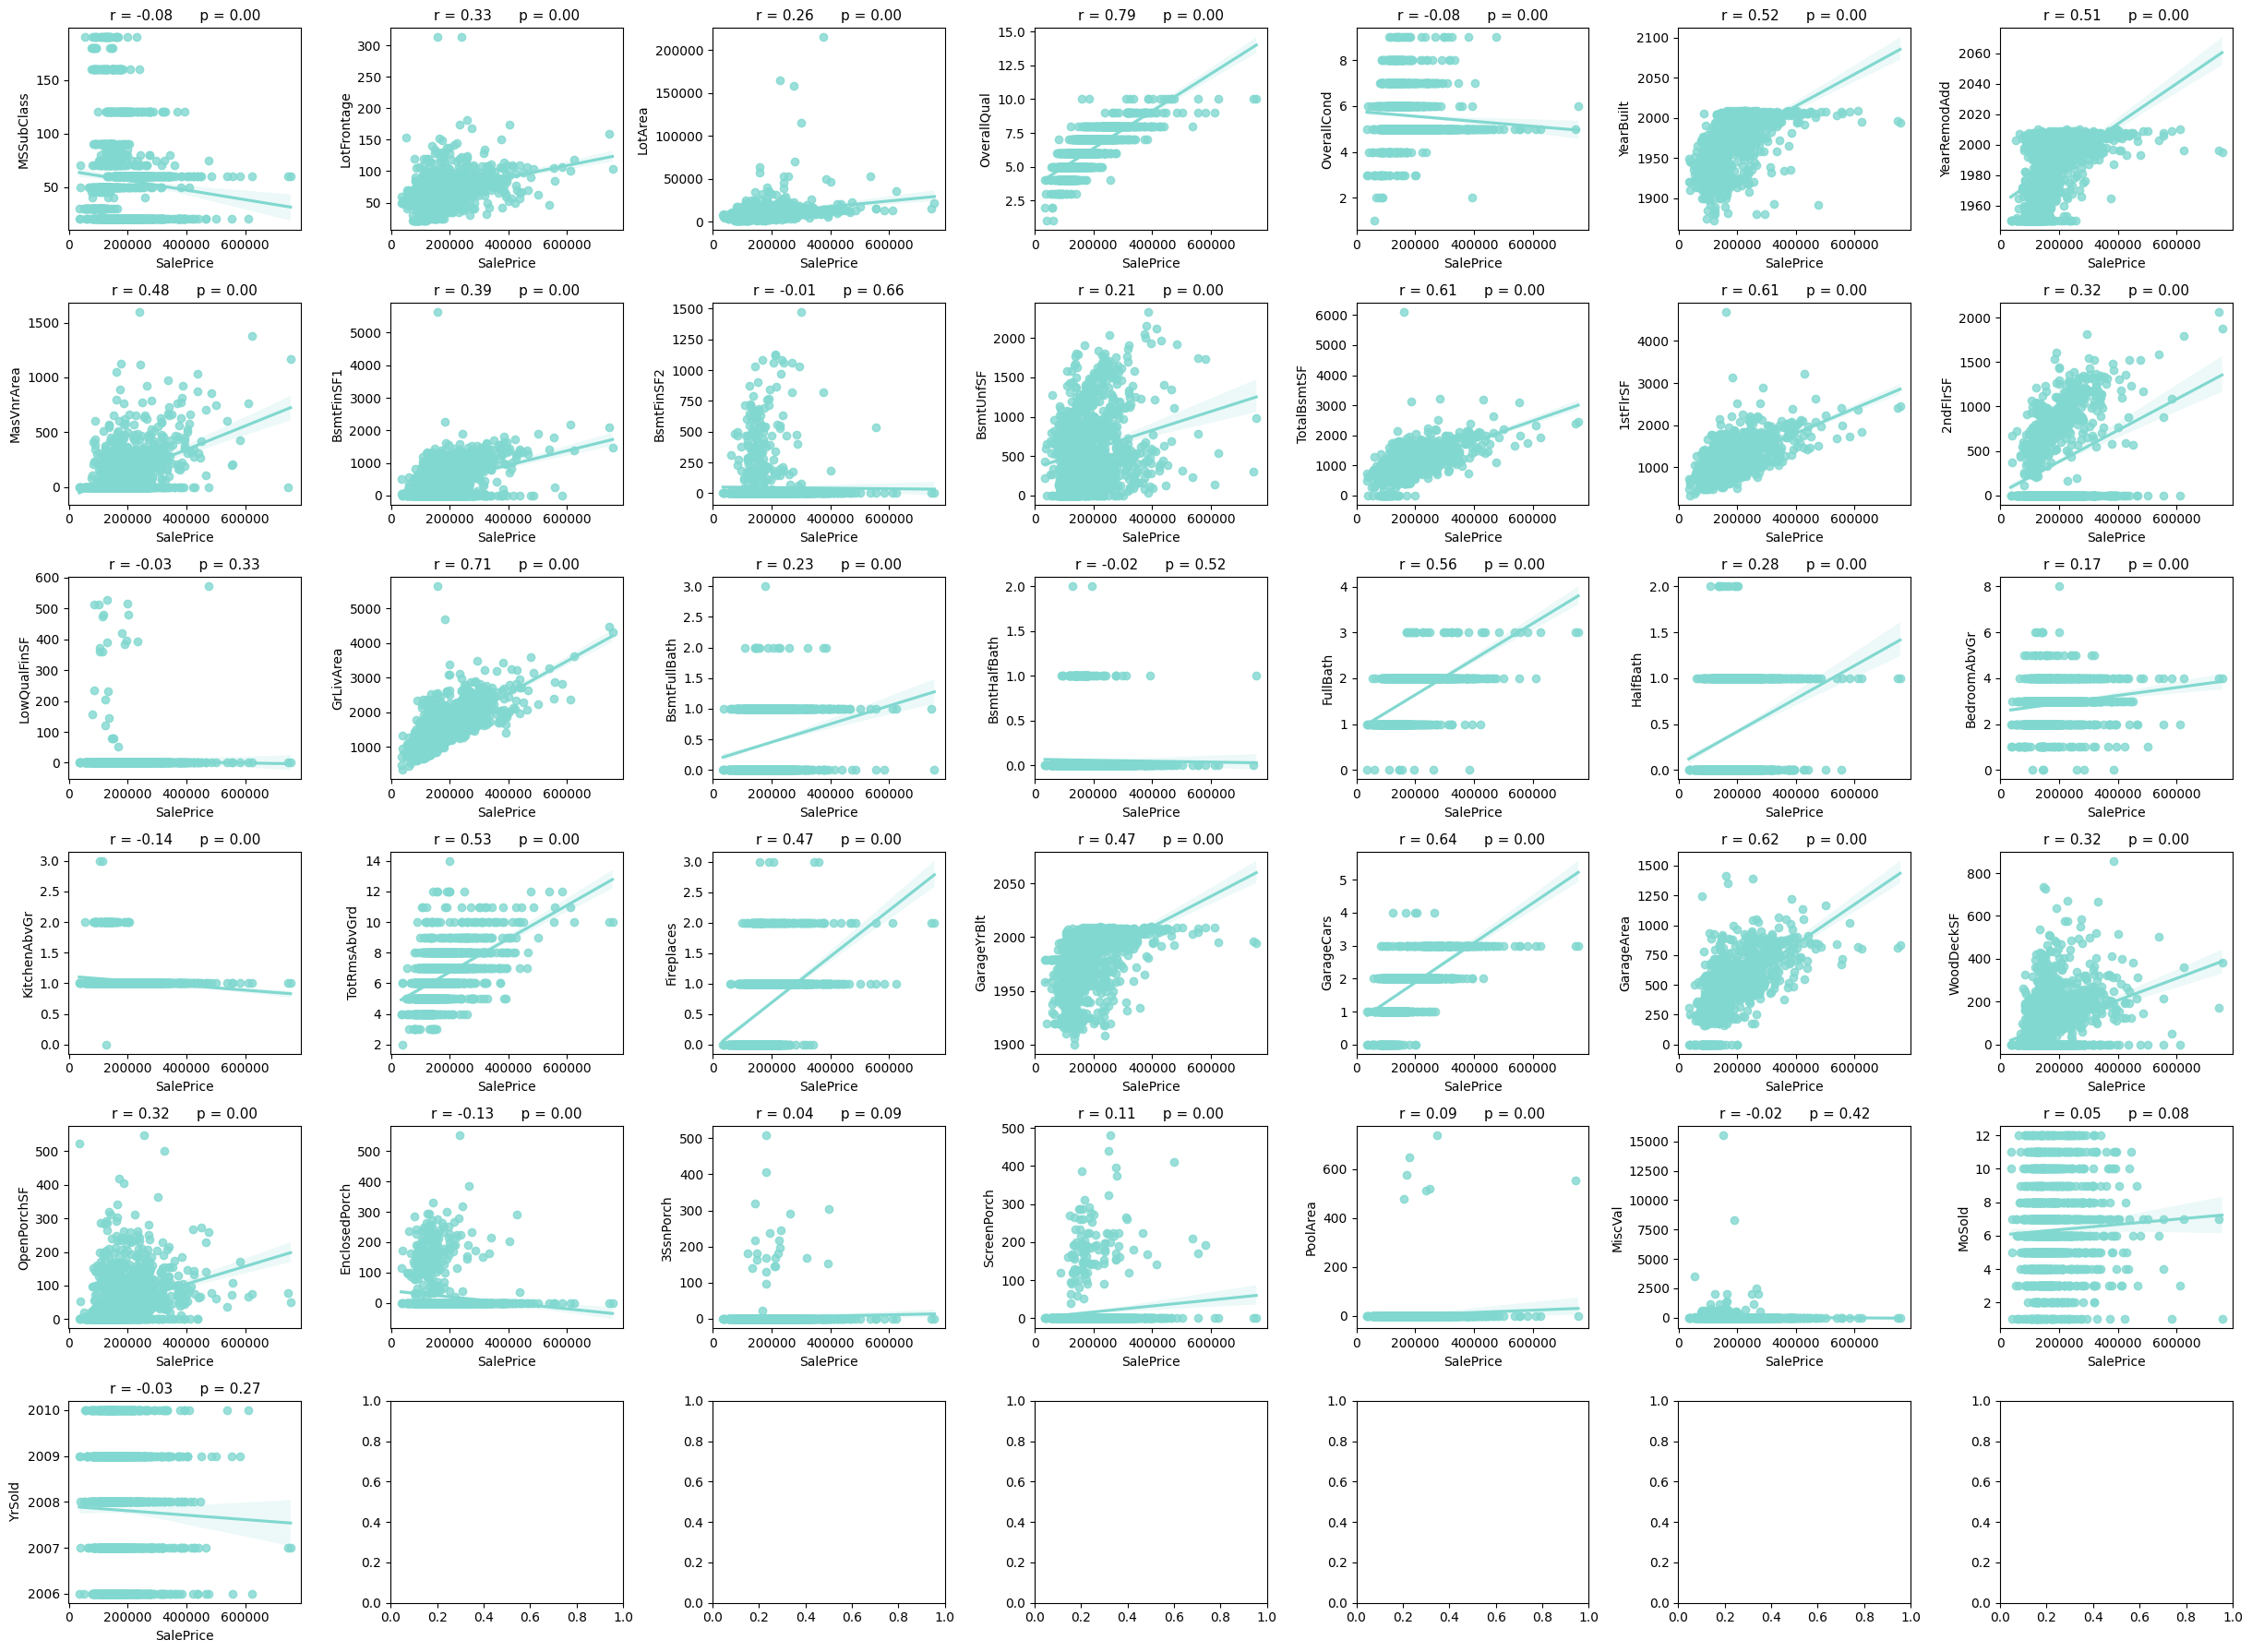

In [631]:
#Надо посмотреть распределениеи признаков и их корелляцию с таргетом
nr_rows = 6
nr_cols = 7

fig, axs = pl.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

num_feats = list(numerical_feats_train)
not_plot = ['Id',  'SalePrice']
plot_num_feats = [c for c in list(numerical_feats_train) if c not in not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sb.regplot(y=train[plot_num_feats[i]], x=train['SalePrice'], ax = axs[r][c], color = "#81D8D0" )
            stp = stats.pearsonr(train[plot_num_feats[i]], train['SalePrice'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



pl.tight_layout()    
pl.show()

In [632]:
train['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [634]:
print(train[train.LotArea > 60000].index)

Int64Index([250, 314, 336, 452, 707, 1299], dtype='int64', name='Id')


In [668]:
train = train.drop(train[train.LotArea > 60000].index)
train = train.drop(train[train.TotalBsmtSF > 4000].index)

In [669]:
print(train[train.LotArea > 60000].index)
print(train[train.TotalBsmtSF > 4000].index)


Int64Index([], dtype='int64', name='Id')
Int64Index([], dtype='int64', name='Id')


In [670]:
#Удалим выбросы

train = train.drop(train[train.PoolArea > 200].index)

In [671]:
train = train.drop(train[train.BsmtFinSF2 > 1250].index)


In [672]:
train = train.drop(train[train.OpenPorchSF > 400].index)


In [673]:
train = train.drop(train[train.GrLivArea > 4500].index)

In [674]:
train = train.drop(train[train.EnclosedPorch > 400].index)


In [675]:
train = train.drop(train[train.MiscVal > 2500].index)


In [676]:
train = train.drop(train[train.PoolArea > 200].index)

In [677]:
train = train.drop(train[train.LotArea > 100000].index)

In [678]:
train = train.drop(train[train.BsmtFinSF1 > 3000].index)


In [680]:
#Переопределим целевую переменную, чтобы убрать оттуда лишние строки
target = train['SalePrice']

In [682]:
print('train:', train.shape)
print('test:', test.shape)
print('test:', target.shape)

train: (1439, 80)
test: (1459, 79)
test: (1439,)


In [647]:
#Проверим, что получилось

print(train[train.PoolArea > 200].index)


Int64Index([], dtype='int64', name='Id')


In [683]:
#Проверим, не приросли ли нули (это будет означать, что с удалением были какие-то косяки)
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [649]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


C:\Users\sergo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


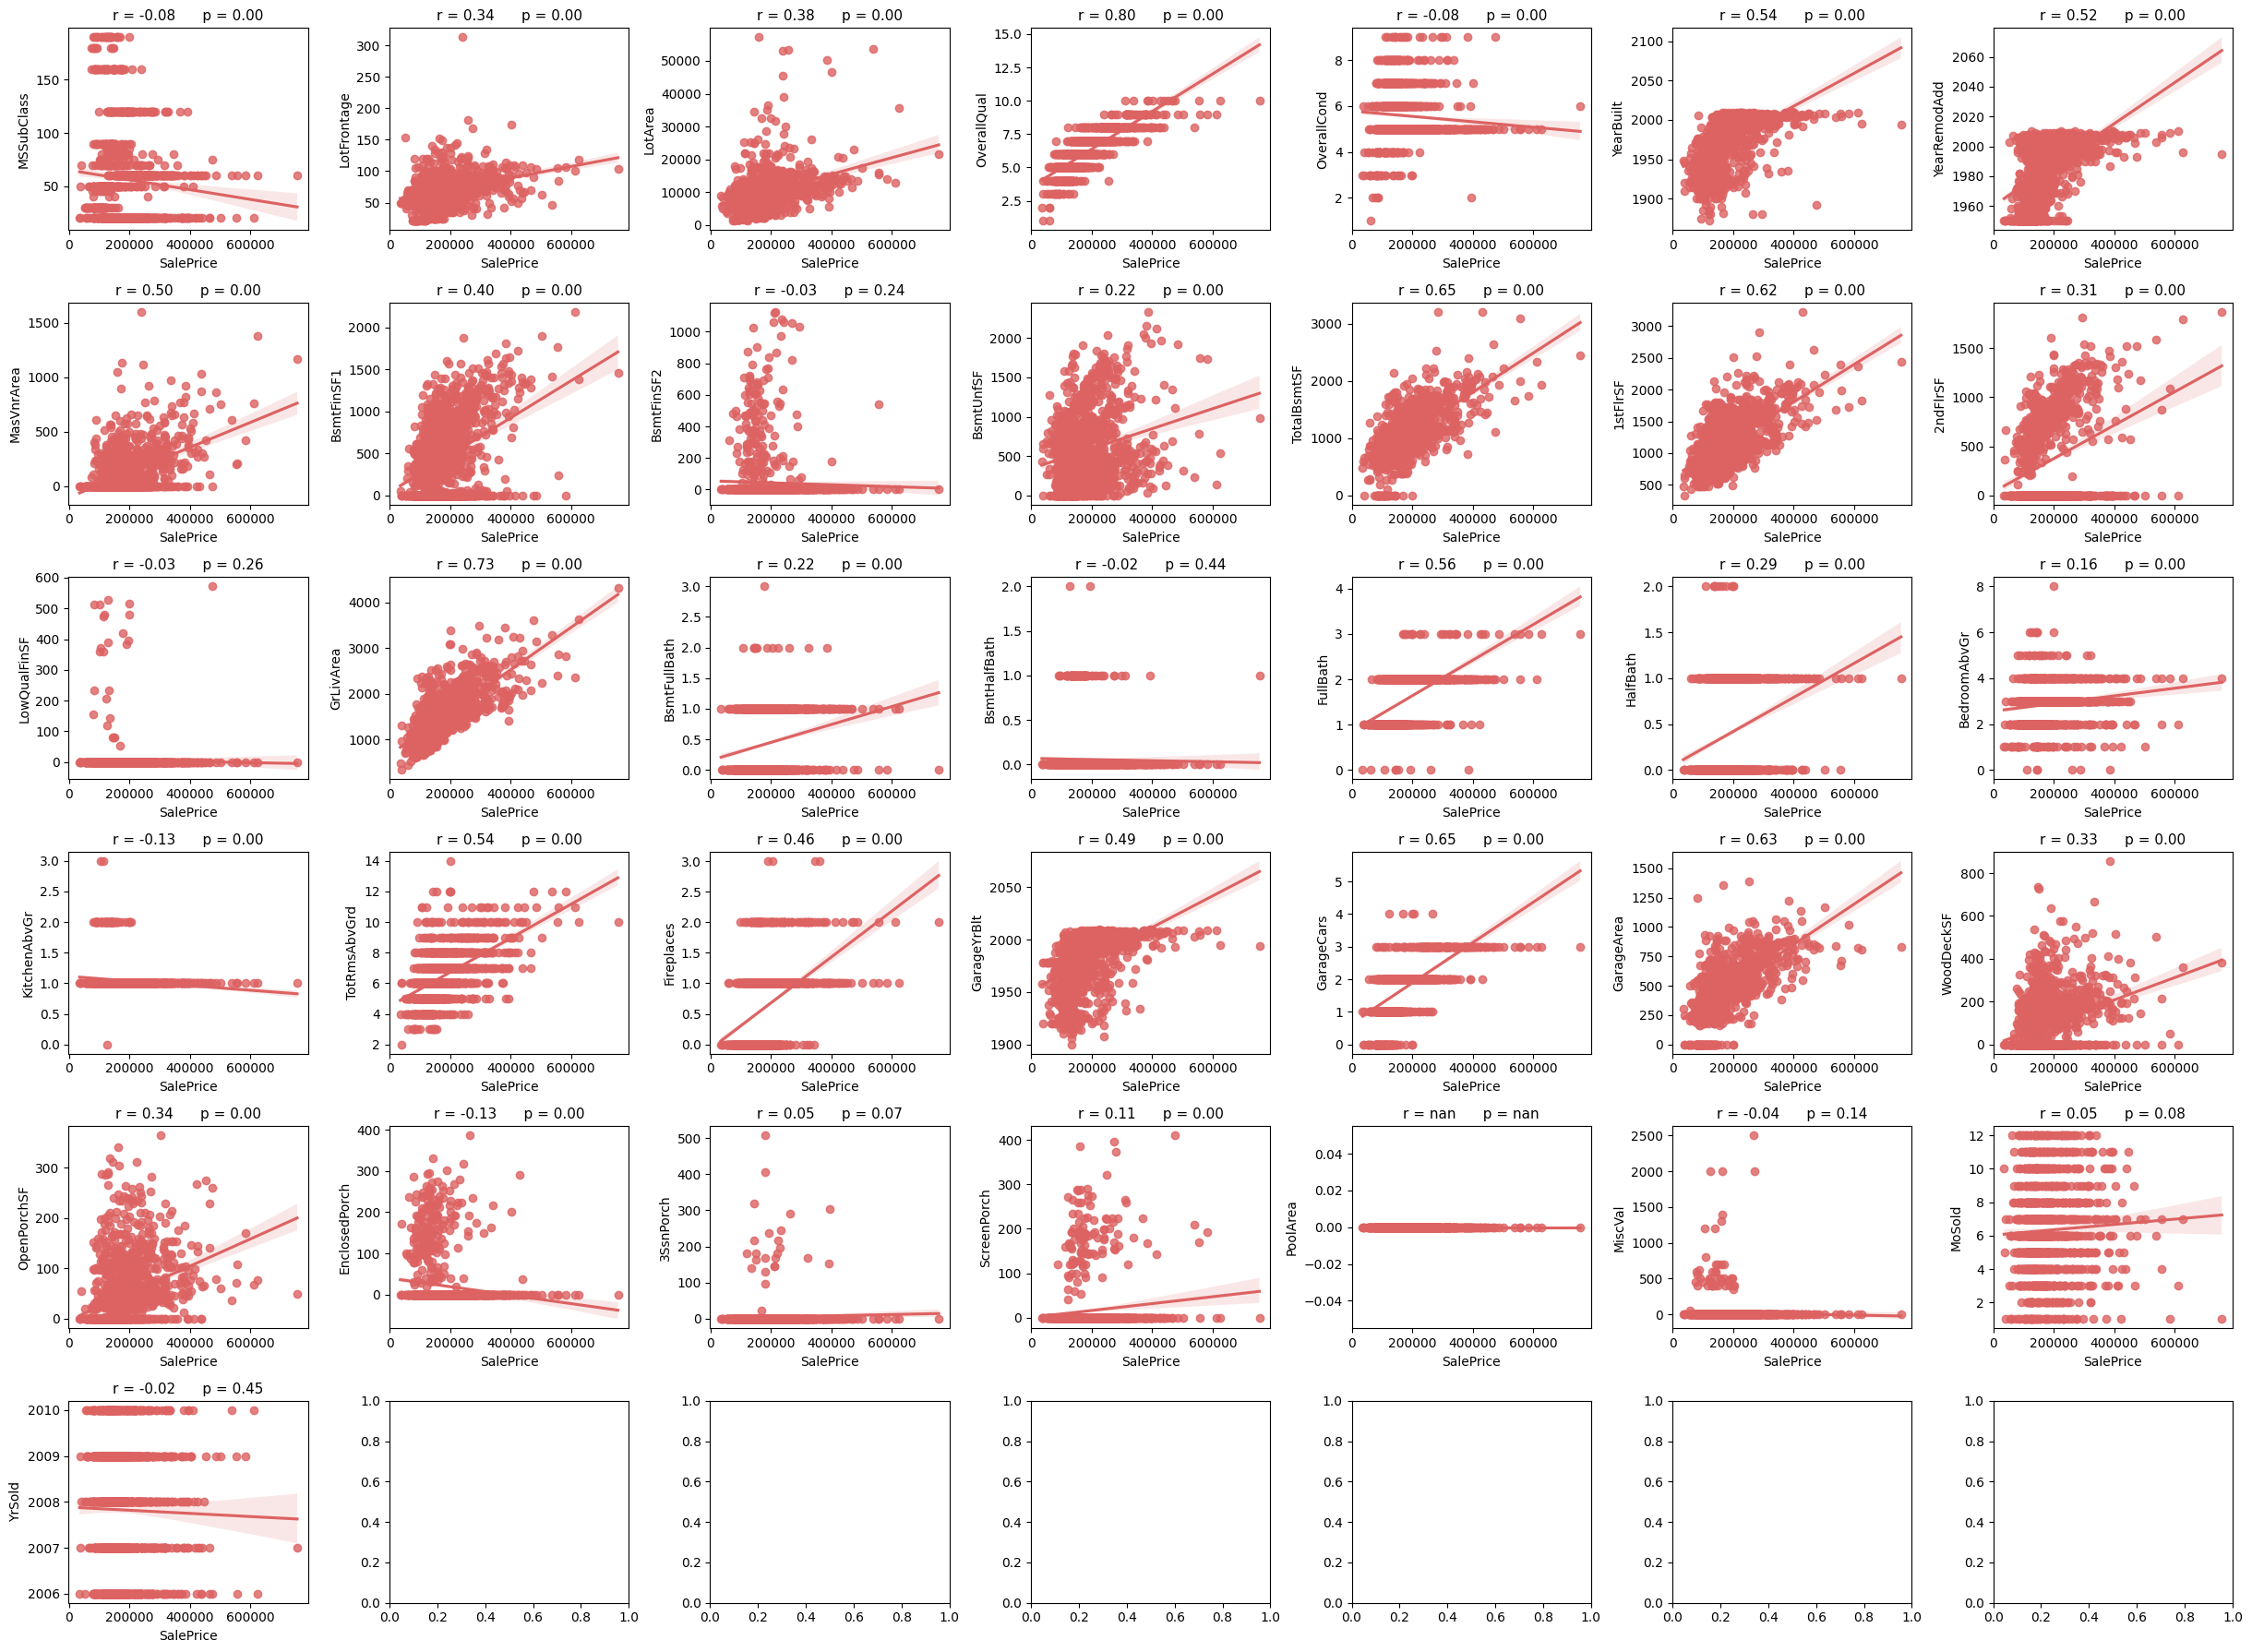

In [650]:
nr_rows = 6
nr_cols = 7

fig, axs = pl.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

plot_num_feats = [c for c in list(numerical_feats_train) if c not in 'SalePrice']


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sb.regplot(y=train[plot_num_feats[i]], x=train['SalePrice'], ax = axs[r][c], color = "#dd6262" )
            stp = stats.pearsonr(train[plot_num_feats[i]], train['SalePrice'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



pl.tight_layout()    
pl.show()

In [562]:
# Выбросы остались, но мне не хотелось бы их удалять, потому что данные выглядят реально. Просто редкие варианты. 
# Поэтому пока будем работать со всем, что осталось.
# Но если не будет сходиться - не забыть вернуться сюда и еще раз подумать

(array([0, 1, 2]),
 [Text(0, 0, 'None'), Text(1, 0, 'Grvl'), Text(2, 0, 'Pave')])

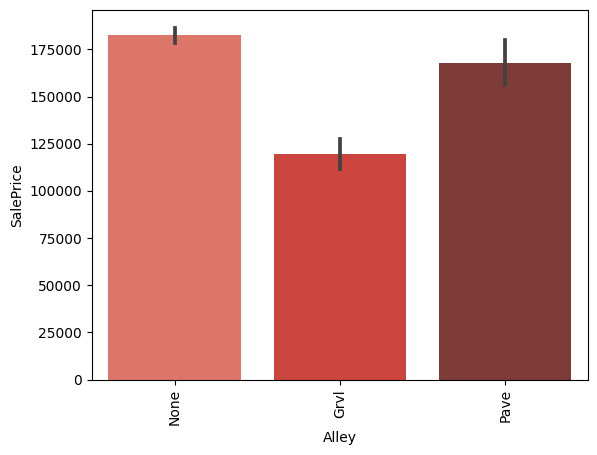

In [651]:
# Посмотрим цену в зависимости от типа доступа к переулку (просто интересно)
sb.barplot(x='Alley', y='SalePrice', data=train, palette = "Reds_d")
pl.xticks(rotation=90)

In [684]:
# Прежде, чем делать One-Hot преобразование, надо посомтреть, есть ли какие-то категории в тестовом сете, которых нет в тренировочном и наоборот
categorical_feats_train = train.dtypes[train.dtypes == 'object'].index

for catcol in train[categorical_feats_train]:
    alldif = train_dif = set(train[catcol]).symmetric_difference(set(test[catcol]))

    train_dif = set(train[catcol]).difference(set(test[catcol]))
    test_dif = set(test[catcol]).difference(set(train[catcol]))
    if len(train_dif) > 0 :        
        print(catcol, 'train:', train_dif )
    if len(test_dif) >0 :
        print(catcol, 'test:', test_dif)



MSZoning test: {'None'}
Utilities train: {'NoSeWa'}
Utilities test: {'None'}
Condition2 train: {'RRAn', 'RRNn'}
Condition2 test: {'PosA'}
HouseStyle train: {'2.5Fin'}
RoofMatl train: {'Metal', 'Roll', 'Membran'}
Exterior1st train: {'Stone', 'ImStucc'}
Exterior1st test: {'None'}
Exterior2nd train: {'Other'}
Exterior2nd test: {'None'}
Heating train: {'Floor', 'OthW'}
Electrical train: {'None', 'Mix'}
KitchenQual test: {'None'}
Functional test: {'None'}
GarageQual train: {'Ex'}
PoolQC test: {'Ex', 'Gd'}
MiscFeature test: {'Gar2'}
SaleType test: {'None'}


In [685]:
# One-Hot преобразование тренировочного датасета
train = pd.get_dummies(train,columns=
    ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
         )

# Удалим целевую переменную 
train = train.drop(columns=['SalePrice'])

In [686]:
print('train:', train.shape)
print('test:', test.shape)
print('target:', target.shape)

train: (1439, 295)
test: (1459, 79)
target: (1439,)


In [653]:
# Посмотрим несколько первых строк для отслеживания преобразований данных
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [687]:
# One-Hot преобразование тестового датасета
test = pd.get_dummies(test,columns=
    ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
         )

In [569]:
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [688]:
print('train:', train.shape)
print('test:', test.shape)

train: (1439, 295)
test: (1459, 291)


In [689]:
# Удалим лишние столбцы. Те, которые есть в одном сете и нет в другом. 

train = train.drop(columns=['Utilities_NoSeWa'])
train = train.drop(columns=['Condition2_RRAn'])
train = train.drop(columns=['Condition2_RRNn'])
train = train.drop(columns=['HouseStyle_2.5Fin'])
train = train.drop(columns=['RoofMatl_Roll'])
train = train.drop(columns=['RoofMatl_Metal'])
train = train.drop(columns=['RoofMatl_Membran'])
train = train.drop(columns=['Exterior1st_ImStucc'])
train = train.drop(columns=['Exterior1st_Stone'])
train = train.drop(columns=['Exterior2nd_Other'])
train = train.drop(columns=['Heating_Floor'])
train = train.drop(columns=['Heating_OthW'])
train = train.drop(columns=['Electrical_None'])
train = train.drop(columns=['Electrical_Mix'])
train = train.drop(columns=['GarageQual_Ex'])

test = test.drop(columns=['MSZoning_None'])
test = test.drop(columns=['Utilities_None'])
test = test.drop(columns=['Condition2_PosA'])
test = test.drop(columns=['Exterior1st_None'])
test = test.drop(columns=['Exterior2nd_None'])
test = test.drop(columns=['KitchenQual_None'])
test = test.drop(columns=['Functional_None'])
test = test.drop(columns=['PoolQC_Ex'])
test = test.drop(columns=['PoolQC_Gd'])
test = test.drop(columns=['MiscFeature_Gar2'])
test = test.drop(columns=['SaleType_None'])

In [702]:
#Количество строк не совпадает. Удалим из теста лишнее
test = test.iloc[20:]


In [703]:
print('train:', train.shape)
print('test:', test.shape)
print('target:', target.shape)

train: (1439, 280)
test: (1439, 280)
target: (1439,)


In [704]:
len((train.columns).difference(test.columns))


0

# Нормализация

In [705]:
sc = StandardScaler()
sc_train = sc.fit_transform(train)
sc_test = sc.transform(test)

In [706]:
sc_train = pd.DataFrame(sc_train)
sc_train.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,0.075740,-0.222760,-0.292323,0.663440,-0.516998,1.046871,0.875753,0.517206,0.626881,-0.286238,...,-0.059049,-0.301626,-0.045707,0.391209,-0.26885,-0.052796,-0.087767,-0.11872,0.464081,-0.305721
1,-0.871995,0.501198,-0.069540,-0.065331,2.185037,0.152247,-0.431216,-0.575485,1.258283,-0.286238,...,-0.059049,-0.301626,-0.045707,0.391209,-0.26885,-0.052796,-0.087767,-0.11872,0.464081,-0.305721
2,0.075740,-0.077968,0.250105,0.663440,-0.516998,0.980603,0.827347,0.327657,0.116188,-0.286238,...,-0.059049,-0.301626,-0.045707,0.391209,-0.26885,-0.052796,-0.087767,-0.11872,0.464081,-0.305721
3,0.312673,-0.464079,-0.079226,0.663440,-0.516998,-1.868941,-0.721654,-0.575485,-0.510572,-0.286238,...,-0.059049,-0.301626,-0.045707,0.391209,3.71955,-0.052796,-0.087767,-0.11872,-2.154794,-0.305721
4,0.075740,0.694254,0.833216,1.392211,-0.516998,0.947469,0.730534,1.375748,0.508493,-0.286238,...,-0.059049,-0.301626,-0.045707,0.391209,-0.26885,-0.052796,-0.087767,-0.11872,0.464081,-0.305721


In [707]:
sc_test = pd.DataFrame(sc_test)
sc_test.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,0.075740,1.707794,0.715044,1.392211,-0.516998,1.013737,0.827347,0.717904,0.329750,-0.286238,...,-0.059049,-0.301626,-0.045707,0.391209,-0.26885,-0.052796,-0.087767,-0.11872,0.464081,-0.305721
1,1.497342,-1.381092,-0.547652,1.392211,-0.516998,1.146274,1.020972,0.416856,-0.956268,-0.286238,...,-0.059049,-0.301626,-0.045707,0.391209,-0.26885,-0.052796,-0.087767,-0.11872,0.464081,-0.305721
2,-0.871995,1.466475,1.653445,-0.065331,-0.516998,1.113140,0.972566,-0.575485,-1.011980,-0.286238,...,-0.059049,-0.301626,-0.045707,0.391209,-0.26885,-0.052796,-0.087767,-0.11872,0.464081,-0.305721
3,1.497342,-1.284564,-1.308795,0.663440,-0.516998,1.146274,1.020972,-0.497436,-0.974839,-0.286238,...,-0.059049,-0.301626,-0.045707,0.391209,-0.26885,-0.052796,-0.087767,-0.11872,0.464081,-0.305721
4,0.549607,-0.126232,0.647240,0.663440,-0.516998,1.080006,0.924160,-0.575485,-0.255226,-0.286238,...,-0.059049,-0.301626,-0.045707,0.391209,-0.26885,-0.052796,-0.087767,-0.11872,0.464081,-0.305721


In [708]:
# set 'X' for features of scaled Train dataset 'sc_train'
X = sc_train

# set 'y' for the target 'Sale'
y = target

# 'X_Test' for features of scaled Test dataset 'sc_test'
X_Test = sc_test

In [709]:
print('train:', train.shape[0])
print('test:', test.shape[0])

train: 1439
test: 1439


In [712]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [713]:
print(X.shape)
print(y.shape)
print(X_Test.shape)

(1439, 280)
(1439,)
(1439, 280)


In [714]:
# Linear Regression model
LR = LinearRegression()

# Model Training
LR.fit(X_train,y_train)

# Model Prediction
LR_pred = LR.predict(X_test)
LR_pred

array([ 3.02495078e+05,  2.26989328e+05,  1.65662578e+05,  2.00515578e+05,
        2.46107078e+05,  1.80140078e+05,  7.58163281e+04,  2.20519578e+05,
        2.76762328e+05,  1.79062328e+05,  1.87997828e+05,  1.89672078e+05,
        1.86633578e+05,  7.95245781e+04,  1.45158578e+05,  2.52693578e+05,
        1.49926578e+05,  6.34335781e+04,  9.09990781e+04,  1.03342578e+05,
        1.14778328e+05,  2.06426828e+05,  3.80429078e+05,  1.14458578e+05,
        1.93954078e+05,  1.27049578e+05,  1.32660078e+05,  9.45485781e+04,
        1.64342828e+05,  4.16246078e+05,  1.44910578e+05,  1.26613828e+05,
        1.30206328e+05,  2.56400078e+05,  9.51683281e+04,  1.00263578e+05,
        1.49998078e+05,  2.04625578e+05,  2.95333281e+04,  1.38465078e+05,
        2.96049078e+05,  1.17054578e+05,  2.24476578e+05,  9.61680781e+04,
        1.60890328e+05,  3.03673578e+05,  2.29658078e+05,  3.83688078e+05,
        1.55757828e+05,  1.55566328e+05,  1.72313828e+05,  1.34807828e+05,
        1.55127078e+05,  

In [715]:
LRscore = LR.score(X_test, y_test)

In [718]:
# Model Metrics
LRMetrics = pd.DataFrame({'Model': 'Linear Regression',
                          'r2score':r2_score(y_test,LR_pred),
                          'MAE': metrics.mean_absolute_error (y_test,LR_pred),
                          'MSE': metrics.mean_squared_error(y_test,LR_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                          },index=[1])

LRMetrics

,Model,r2score,MAE,MSE,RMSE
1,Linear Regression,-1.251276e+21,3.215979e+14,7.339389e+30,2.709131e+15


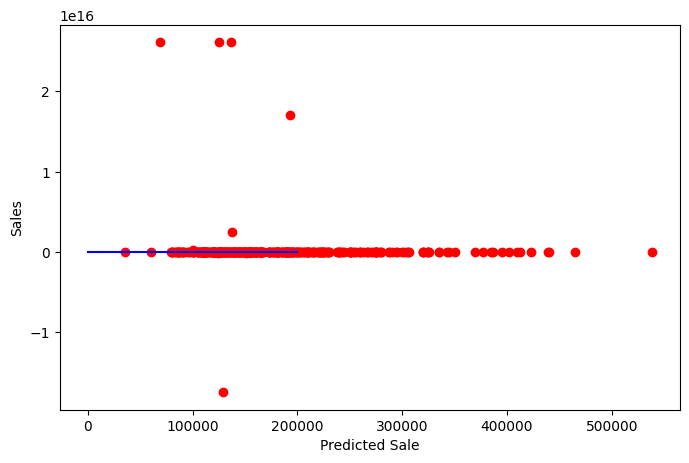

In [730]:
# visualisation of Train dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y_test, LR_pred,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Sale')
pl.ylabel('Sales')
pl.show()

In [723]:
# Test final predictions
LR_pred1 = LR.predict(X_Test)
LR_pred1  

array([304357.078125, 201750.828125, 181981.578125, ..., 185792.203125,
       118661.703125, 221066.953125])

In [725]:
# Model Metrics
LRMetrics1 = pd.DataFrame({'Model': 'Linear Regression',
                           'r2score':r2_score(y,LR_pred1),
                           'MAE': metrics.mean_absolute_error (y,LR_pred1),
                           'MSE': metrics.mean_squared_error(y,LR_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,LR_pred1)),
                                    
                           },index=[1])

LRMetrics1

,Model,r2score,MAE,MSE,RMSE
1,Linear Regression,-1.830684e+23,2.180784e+15,1.109177e+33,3.330431e+16


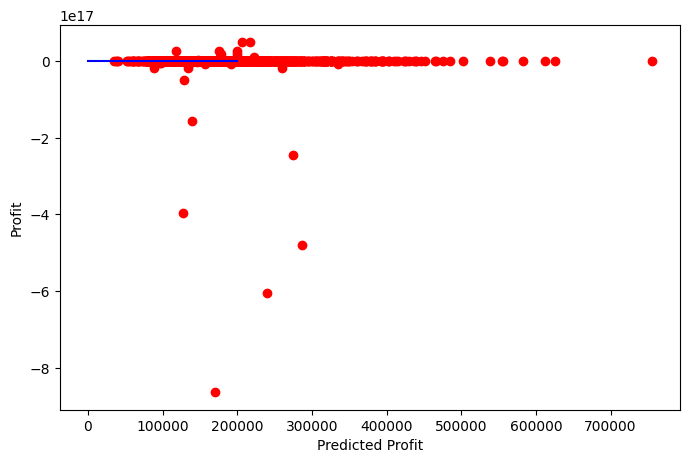

In [731]:
# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, LR_pred1,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [732]:
# сравнение "фактической прибыли" из набора данных Train и прогнозируемой прибыли из тестового набора данных
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='Reds')

,Actual Profit,LR Predicted Profit
Id,,
1,208500,304357.078125
2,181500,201750.828125
3,223500,181981.578125
4,140000,164053.578125
5,250000,181100.578125
6,143000,191961.578125
7,307000,320856.578125
8,200000,17058651521946288.000000
9,129900,203229.578125


## То есть если ошибаться, то по крупному. Попробуем что-нибудь другое


Gradient Boosting Regressor

In [736]:
# Gradient Boosting Regressor model
GB=GradientBoostingRegressor(random_state=0)

# Model Training
GB.fit(X_train,y_train)

# Model Prediction
GB_pred = GB.predict(X_test)

# Model R2 score
GBscore =GB.score(X_test, y_test)

In [737]:
# Model Metrics
GBMetrics = pd.DataFrame({'Model': 'Gradient Boosting Regressor',
                          'r2score':r2_score(y_test,GB_pred),
                          'MAE': metrics.mean_absolute_error (y_test,GB_pred),
                          'MSE': metrics.mean_squared_error(y_test,GB_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,GB_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,GB_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,GB_pred))             
                          },index=[2])

GBMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
2,Gradient Boosting Regressor,0.908531,15338.033102,5.365142e+08,23162.776059,0.015393,0.12407


In [740]:
# Test final predictions
GB_pred1 = GB.predict(X_Test)

In [741]:
# Model Metrics
GBMetrics1 = pd.DataFrame({'Model': 'GradientBoostingRegressor',
                           'r2score':r2_score(y,GB_pred1),
                           'MAE': metrics.mean_absolute_error (y,GB_pred1),
                           'MSE': metrics.mean_squared_error(y,GB_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,GB_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,GB_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,GB_pred1))             
                          },index=[1])

GBMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,GradientBoostingRegressor,-0.889204,78020.046148,1.144633e+10,106987.533216,0.288273,0.536911


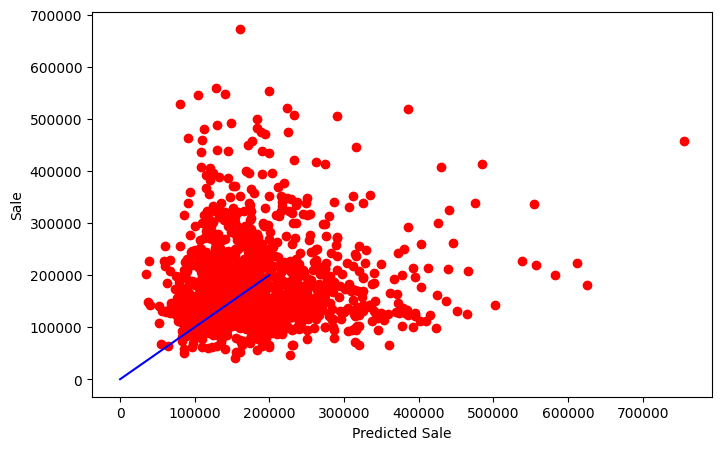

In [743]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, GB_pred1,'ro')
pl.plot([0,200000],[0,200000], 'b-')
pl.xlabel('Predicted Sale')
pl.ylabel('Sale')
pl.show()

In [744]:
frames = [LRMetrics1,GBMetrics1]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,-1.830684e+23,2.180784e+15,1.109177e+33,3.330431e+16,NaN,NaN
1,GradientBoostingRegressor,-8.892044e-01,7.802005e+04,1.144633e+10,1.069875e+05,0.288273,0.536911


In [745]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1, "GB Predicted Profit":GB_pred1})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit,GB Predicted Profit
Id,,,
1,208500,304357.078125,315062.506461
2,181500,201750.828125,204961.386047
3,223500,181981.578125,164051.947720
4,140000,164053.578125,170188.340499
5,250000,181100.578125,170864.542596
6,143000,191961.578125,192984.635024
7,307000,320856.578125,330110.912849
8,200000,17058651521946288.000000,238309.520572
9,129900,203229.578125,203122.901414


In [747]:
# submission of .csv file with final predictions
sub = pd.DataFrame()
sub['ID'] = test.index
sub['Profit'] = GB_pred1
sub.to_csv('StartupPredictions.csv', index=False)